In [1]:
import pandas as pd

In [2]:
data_path = "data/Heart_health.csv"

data = pd.read_csv(data_path)

In [3]:
print(data.head())

   ID             Name  Age  Gender  Height(cm)  Weight(kg)  \
0   1         John Doe   45    Male         175          80   
1   2       Jane Smith   35  Female         160          65   
2   3  Michael Johnson   55    Male         180          85   
3   4      Sarah Brown   40  Female         165          70   
4   5        David Lee   50    Male         170          75   

  Blood Pressure(mmHg)  Cholesterol(mg/dL)  Glucose(mg/dL) Smoker  \
0               120/80                 200              90     No   
1               110/70                 180              80     No   
2               130/85                 220              95    Yes   
3               115/75                 190              85     No   
4               125/80                 210              92    Yes   

   Exercise(hours/week)  Heart Attack  
0                     3             0  
1                     2             0  
2                     4             1  
3                     3             0  
4     

In [4]:
data = data.drop("Name", axis=1)
data = data.drop("ID", axis=1)
data = data.drop("Gender", axis=1)

yes_no_mapping = {'Yes': 1, 'No': 0}
data.replace(yes_no_mapping, inplace=True)

# Split the Blood Pressure column into Systolic and Diastolic (Help from ChatGPT)
data[['Systolic', 'Diastolic']] = data['Blood Pressure(mmHg)'].str.split('/', expand=True)

data['Systolic'] = pd.to_numeric(data['Systolic'])
data['Diastolic'] = pd.to_numeric(data['Diastolic'])

data = data.drop("Blood Pressure(mmHg)", axis=1)

In [5]:
print(data.head())

   Age  Height(cm)  Weight(kg)  Cholesterol(mg/dL)  Glucose(mg/dL)  Smoker  \
0   45         175          80                 200              90       0   
1   35         160          65                 180              80       0   
2   55         180          85                 220              95       1   
3   40         165          70                 190              85       0   
4   50         170          75                 210              92       1   

   Exercise(hours/week)  Heart Attack  Systolic  Diastolic  
0                     3             0       120         80  
1                     2             0       110         70  
2                     4             1       130         85  
3                     3             0       115         75  
4                     2             1       125         80  


In [6]:
X = data.drop("Heart Attack", axis=1)
X = X.values

y = data["Heart Attack"]
y = y.values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

In [9]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)

rmse

0.04155858174616914

In [11]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)

rmse

0.08304547985373997

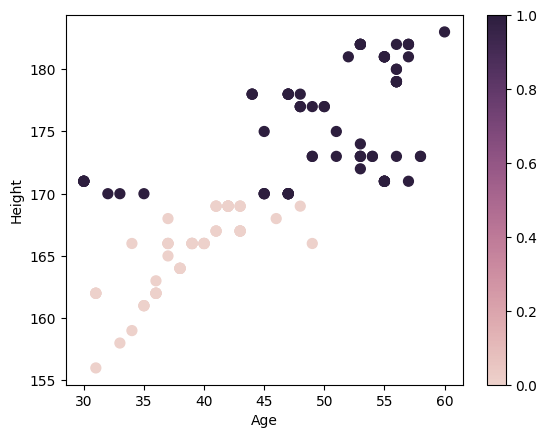

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
ax.set_xlabel('Age')
ax.set_ylabel('Height')
f.colorbar(points)
plt.show()

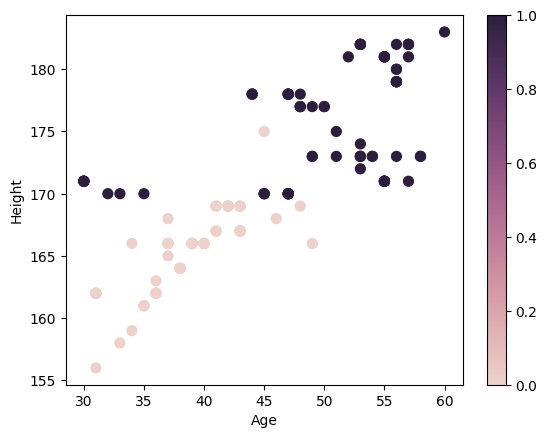

In [13]:
# Plot the actual data
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
ax.set_xlabel('Age')
ax.set_ylabel('Height')
f.colorbar(points)
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)

gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [15]:
print(gridsearch.best_params_)

{'n_neighbors': 1}


In [16]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)

print(train_rmse)

0.0


In [17]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print(test_rmse)

0.14383899044561524
